In [135]:
import pandas as pd

In [136]:
#Les fichiers ont étés manuellement transformés avant ce script ( repertoire données brutes au répertoire donnees_brutes_transformation_manuelle): 
# Les caracteres non alphanumériques ont étés remplacés par les caractères appropriés
#Les pays avec des virgules dans leur nom ont étés transformés pour supprimer les virgules
#elles étaient confondues avec les virgules qui separent les cellules/champs/colonnes

In [137]:
#Ouverture des fichiers
#import pandas as pd

#A changer selon le pc
path_fichier = "C:\\Users\\rober\\OneDrive\\Documents\\SuperProf_Python\\Elena\\sujet\\donnees_brutes_transformation_manuelle\\"

aide_alimentaire_df = pd.read_csv(path_fichier+"aide_alimentaire.csv",sep = ";",encoding = "ISO-8859-1")
population_df = pd.read_csv(path_fichier+"population.csv",sep = ";",encoding = "ISO-8859-1")
sous_nutrition_df = pd.read_csv(path_fichier+"sous_nutrition.csv",sep = ";",encoding = "ISO-8859-1")
dispo_alimentaire_df = pd.read_csv(path_fichier+"dispo_alimentaire.csv",sep = ";",encoding = "ISO-8859-1")

In [138]:
#1 - Nettoyage des données
#La colonne valeur ne doit comporter que des nombres, on remplace <0.1 par 0.1
sous_nutrition_df["Valeur"] = sous_nutrition_df["Valeur"].str.replace("<0.1","0.1",regex=True)

In [139]:
#creation d'une fonction pour transformée un intervalle d'année en une année moyenne représentant l'intervalle 
#pour le fichier sous nutrition

test="2012-2014"

def moyenne_annee(chaine_entree):
    chaine_1,chaine_2=chaine_entree.split("-")
    
    return int((int(chaine_1)+int(chaine_2))/2)
    
r = moyenne_annee(test)
r

2013

In [140]:
sous_nutrition_df

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [141]:
#on applique la fonction moyenne_annee a toute les lignes de la dataframe sous_nutrition_df

sous_nutrition_df['Année'] = sous_nutrition_df.apply(lambda row : moyenne_annee(row["Année"]), axis = 1)

In [142]:
sous_nutrition_df

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


In [143]:
#on remplace les valeurs nuls de la colonne Valeur par 0 et on la convertit en float

sous_nutrition_df['Valeur'] = sous_nutrition_df['Valeur'].fillna(0)
sous_nutrition_df['Valeur'] = pd.to_numeric(sous_nutrition_df['Valeur'])

In [144]:
#on remplace les valeurs nuls de la colonne Valeur par 0
dispo_alimentaire_df = dispo_alimentaire_df.fillna(0)

In [145]:

dispo_alimentaire_df.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [146]:
sous_nutrition_df

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


In [147]:
#On selectionne uniquement l'année 2017 de la dataframe sous_nutrition_df
sous_nutrition_df = sous_nutrition_df[sous_nutrition_df["Année"] == 2017]
sous_nutrition_df

,Zone,Année,Valeur
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,0.0
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8.0
1198,Viet Nam,2017,6.5
1204,Yémen,2017,0.0
1210,Zambie,2017,0.0


In [148]:
population_df

,Zone,Année,Valeur
0,Afghanistan,2013.0,32269.589
1,Afghanistan,2014.0,33370.794
2,Afghanistan,2015.0,34413.603
3,Afghanistan,2016.0,35383.032
4,Afghanistan,2017.0,36296.113
...,...,...,...
1411,Zimbabwe,2014.0,13586.707
1412,Zimbabwe,2015.0,13814.629
1413,Zimbabwe,2016.0,14030.331
1414,Zimbabwe,2017.0,14236.595


In [149]:
#2 - La proportion des personnes en état de sous nutrition en 2017
#La colonne Valeur de la dataframe sous nutrition est en millions d'habitants
#La colonne Valeur de la dataframe population est en milliers d'habitants

#Conversion de la colonne Valeur de la dataframe population en millions d'habitants
population_df["Valeur"] = population_df["Valeur"]/1000

In [150]:
population_df

,Zone,Année,Valeur
0,Afghanistan,2013.0,32.269589
1,Afghanistan,2014.0,33.370794
2,Afghanistan,2015.0,34.413603
3,Afghanistan,2016.0,35.383032
4,Afghanistan,2017.0,36.296113
...,...,...,...
1411,Zimbabwe,2014.0,13.586707
1412,Zimbabwe,2015.0,13.814629
1413,Zimbabwe,2016.0,14.030331
1414,Zimbabwe,2017.0,14.236595


In [151]:
#On selectionne uniquement l'année 2017 de la dataframe population
population_df_2017 = population_df[population_df["Année"] == 2017]
population_df_2017

,Zone,Année,Valeur
4,Afghanistan,2017.0,36.296113
10,Afrique du Sud,2017.0,57.009756
16,Albanie,2017.0,2.884169
22,Algérie,2017.0,41.389189
28,Allemagne,2017.0,82.658409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017.0,29.402484
1396,Viet Nam,2017.0,94.600648
1402,Yémen,2017.0,27.834819
1408,Zambie,2017.0,16.853599


In [152]:
#On affiche les pays avant la fusion des données
print("Nombre de pays dans la dataframe de population de 2017 : ",len(list(set(population_df_2017["Zone"]))))
print("\n")
print("Liste de pays associés : \n\n",list(set(population_df_2017["Zone"])))

Nombre de pays dans la dataframe de population de 2017 :  78


Liste de pays associés : 

 ['Arménie', 'Saint-Marin', 'Antilles néerlandaises (ex)', 'Togo', 'Suisse', 'Angola', 'Ascension et Tristan da Cunha Sainte-Hélène', 'Anguilla', 'Tadjikistan', 'Tchad', 'Samoa', 'Trinité-et-Tobago', 'Sri Lanka', 'Zambie', 'Arabie saoudite', 'Azerbaïdjan', 'Belgique', 'Thaïlande', 'Timor-Leste', 'Turkménistan', 'Chine continentale', 'Viet Nam', 'Bonaire Saint-Eustache et Saba', 'Yémen', 'Sénégal', 'Sint Maarten  (partie néerlandaise)', 'Andorre', 'Bélarus', 'Bolivie (État plurinational de)', 'Saint-Pierre-et-Miquelon', 'Algérie', 'Tonga', 'Ukraine', 'Bénin', 'Afrique du Sud', 'Saint-Siège', 'Serbie', 'Barbade', 'Saint-Vincent-et-les Grenadines', 'Saint-Martin (partie française)', 'Bhoutan', 'Saint-Kitts-et-Nevis', 'Slovaquie', 'Aruba', 'Sierra Leone', 'Bermudes', 'Suriname', 'Tunisie', 'Suède', 'Uruguay', 'Autriche', 'Bahamas', 'Tokélaou', 'Afghanistan', 'Vanuatu', 'Sainte-Lucie', 'Bangladesh', 'T

In [153]:
print("Nombre de pays dans la dataframe de sous-nutrition de 2017 : ",len(list(set(sous_nutrition_df["Zone"]))))
print("\n")
print("Liste de pays associés : \n\n",list(set(sous_nutrition_df["Zone"])))

Nombre de pays dans la dataframe de sous-nutrition de 2017 :  203


Liste de pays associés : 

 ['Arménie', 'Burkina Faso', 'Libéria', 'Nioué', 'Palaos', 'Koweït', 'République populaire démocratique de Corée', 'Pakistan', 'Kazakhstan', 'Togo', 'République-Unie de Tanzanie', 'Botswana', 'Suisse', 'Angola', 'Îles Marshall', 'Tadjikistan', 'Irlande', 'Maldives', 'Mexique', 'Iraq', 'Portugal', 'Tchad', 'Samoa', 'Haïti', 'Trinité-et-Tobago', 'Gambie', 'Sri Lanka', 'Ouzbékistan', 'Zambie', 'Cameroun', 'Lituanie', 'Arabie saoudite', "Iran (République islamique d')", 'Azerbaïdjan', 'Libye', 'Belgique', 'Papouasie-Nouvelle-Guinée', 'Djibouti', 'Îles Cook', 'Luxembourg', 'Mozambique', 'Lesotho', 'Guinée', 'Îles Salomon', 'Philippines', 'Niger', 'Chine continentale', 'Polynésie française', 'République dominicaine', 'Timor-Leste', 'Viet Nam', 'Grenade', 'République arabe syrienne', 'Yémen', 'Sénégal', 'Burundi', 'Kiribati', 'Nouvelle-Calédonie', 'Andorre', 'Italie', 'Bélarus', 'Bolivie (État pluri

In [154]:
#Resultats de merge des dataframe

liste_pays_population = set(list(population_df_2017["Zone"]))
liste_pays_sous_nutrition = set(list(sous_nutrition_df["Zone"]))

#Pays communs aux deux dataframes
print("Nombre de pays communs aux deux dataframes",len(liste_pays_population & liste_pays_sous_nutrition))
#Pays unique dans la dataframe population 2017
print("Pays unique dans la dataframe population 2017",len(liste_pays_sous_nutrition.difference(liste_pays_population) ))
#Pays unique dans la dataframe sous_nutrition
print("Pays unique dans la dataframe sous_nutrition",len(liste_pays_population.difference(liste_pays_sous_nutrition) ))


#print("Pays unique dans la dataframe population 2017",sorted(liste_pays_sous_nutrition.difference(liste_pays_population) ))
#print("\n\n")
#print("Pays unique dans la dataframe sous_nutrition",sorted(liste_pays_population.difference(liste_pays_sous_nutrition) ))

Nombre de pays communs aux deux dataframes 68
Pays unique dans la dataframe population 2017 135
Pays unique dans la dataframe sous_nutrition 10


In [155]:
#fusion des dataframes population 2017 et sous_nutrition_df
pop_nut_2017 = pd.merge(population_df_2017, sous_nutrition_df, on=["Zone"])
pop_nut_2017

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2017.0,36.296113,2017,10.5
1,Afrique du Sud,2017.0,57.009756,2017,3.1
2,Albanie,2017.0,2.884169,2017,0.1
3,Algérie,2017.0,41.389189,2017,1.3
4,Allemagne,2017.0,82.658409,2017,0.0
...,...,...,...,...,...
63,Venezuela (République bolivarienne du),2017.0,29.402484,2017,8.0
64,Viet Nam,2017.0,94.600648,2017,6.5
65,Yémen,2017.0,27.834819,2017,0.0
66,Zambie,2017.0,16.853599,2017,0.0


In [156]:
#On supprimer la colonne Année_x et Année_y
pop_nut_2017 = pop_nut_2017.drop(["Année_x"], axis=1)
pop_nut_2017 = pop_nut_2017.drop(["Année_y"], axis=1)
pop_nut_2017

,Zone,Valeur_x,Valeur_y
0,Afghanistan,36.296113,10.5
1,Afrique du Sud,57.009756,3.1
2,Albanie,2.884169,0.1
3,Algérie,41.389189,1.3
4,Allemagne,82.658409,0.0
...,...,...,...
63,Venezuela (République bolivarienne du),29.402484,8.0
64,Viet Nam,94.600648,6.5
65,Yémen,27.834819,0.0
66,Zambie,16.853599,0.0


In [157]:
#on remplace les noms de colonnes Valeur_x et Valeur_y
#proportion en pourcentage
pop_nut_2017.rename(columns={'Valeur_x': 'Population_mondiale', 'Valeur_y': 'Population_en_malnutrition'}, inplace=True)

In [158]:
pop_nut_2017

,Zone,Population_mondiale,Population_en_malnutrition
0,Afghanistan,36.296113,10.5
1,Afrique du Sud,57.009756,3.1
2,Albanie,2.884169,0.1
3,Algérie,41.389189,1.3
4,Allemagne,82.658409,0.0
...,...,...,...
63,Venezuela (République bolivarienne du),29.402484,8.0
64,Viet Nam,94.600648,6.5
65,Yémen,27.834819,0.0
66,Zambie,16.853599,0.0


In [159]:
#On calcule la proportion en malnutrition
pop_nut_2017["Proportion_mal_nutrition"] = (pop_nut_2017["Population_en_malnutrition"]/pop_nut_2017["Population_mondiale"])*100
pop_nut_2017

,Zone,Population_mondiale,Population_en_malnutrition,Proportion_mal_nutrition
0,Afghanistan,36.296113,10.5,28.928718
1,Afrique du Sud,57.009756,3.1,5.437666
2,Albanie,2.884169,0.1,3.467203
3,Algérie,41.389189,1.3,3.140917
4,Allemagne,82.658409,0.0,0.000000
...,...,...,...,...
63,Venezuela (République bolivarienne du),29.402484,8.0,27.208586
64,Viet Nam,94.600648,6.5,6.870989
65,Yémen,27.834819,0.0,0.000000
66,Zambie,16.853599,0.0,0.000000


In [160]:
#on enleve les pays avec une proportion de nutrition égale à 0
pop_nut_2017 = pop_nut_2017[pop_nut_2017["Proportion_mal_nutrition"] > 0]

In [161]:
#on trie les pays selon la proportion de malnutrition
pop_nut_2017 = pop_nut_2017.sort_values(["Proportion_mal_nutrition"], ascending=False)
pop_nut_2017

,Zone,Population_mondiale,Population_en_malnutrition,Proportion_mal_nutrition
29,Saint-Vincent-et-les Grenadines,0.109827,0.1,91.052291
32,Sao Tomé-et-Principe,0.207089,0.1,48.288417
48,Tchad,15.016753,5.7,37.957606
62,Vanuatu,0.285510,0.1,35.025043
17,Barbade,0.286232,0.1,34.936695
51,Timor-Leste,1.243258,0.4,32.173531
0,Afghanistan,36.296113,10.5,28.928718
63,Venezuela (République bolivarienne du),29.402484,8.0,27.208586
36,Sierra Leone,7.488423,2.0,26.707893
20,Belize,0.375769,0.1,26.612094


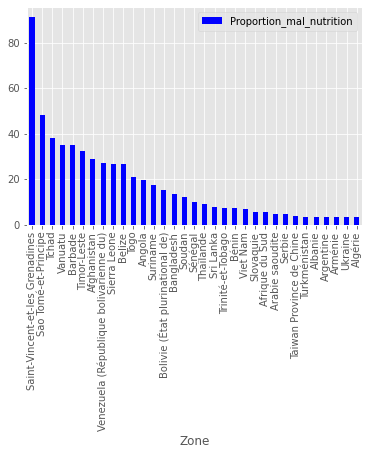

In [198]:
#on affiche le resultat sous forme de graphique
import matplotlib.pyplot as plt

plt.style.use('ggplot')

pop_nut_2017.plot(x="Zone", y=["Proportion_mal_nutrition"],color="b", kind="bar", rot=90)
plt.savefig('Proportion_mal_nutrition.png',bbox_inches="tight")

#Remarque importante

#Saint-vincent et les grenadines indique une proportion de population en sous nutrition à 90 %. 
#Ceci est faux il fait parti des pays dont on a remplacer le <0.1 par 0.1.
#Bien que cela soit informatiquement juste, 
#l'interpretation est erronée car on ne connait pas le nombre de personne en sous nutrition
#Idem pour les pays suivants : Arménie, Belize, Sao Tomé-et-Principe, Suriname, Trinité-et-Tobago et Vanuatu 


<AxesSubplot:xlabel='Zone'>

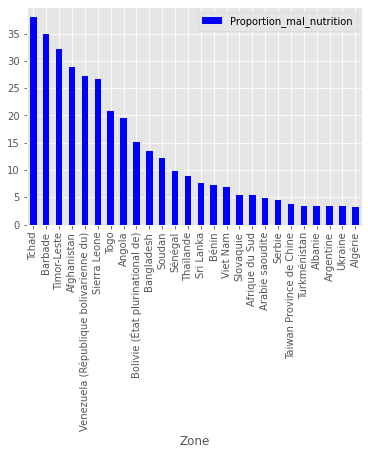

In [163]:
#creation d'un nouveau plot en enlevant les pays avec des valeurs imputées car inconnus

pop_nut_2017_net = pop_nut_2017[pop_nut_2017["Zone"] != 'Saint-Vincent-et-les Grenadines']
pop_nut_2017_net = pop_nut_2017_net[pop_nut_2017_net["Zone"] != 'Arménie']
pop_nut_2017_net = pop_nut_2017_net[pop_nut_2017_net["Zone"] != 'Belize']
pop_nut_2017_net = pop_nut_2017_net[pop_nut_2017_net["Zone"] != 'Sao Tomé-et-Principe']
pop_nut_2017_net = pop_nut_2017_net[pop_nut_2017_net["Zone"] != 'Suriname']
pop_nut_2017_net = pop_nut_2017_net[pop_nut_2017_net["Zone"] != 'Trinité-et-Tobago']
pop_nut_2017_net = pop_nut_2017_net[pop_nut_2017_net["Zone"] != 'Vanuatu']


pop_nut_2017_net.plot(x="Zone", y=["Proportion_mal_nutrition"],color="b", kind="bar", rot=90)

In [164]:
aide_alimentaire_df

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [165]:
#3 - Les pays ayant bénéficiés le plus/le moins d’aide depuis 2013 ( en tonnes d'aliments)

#Creation d'une dataframe pour regrouper tout les produits en une seule ligne par pays en faisant la somme de tout les produits
cumul_aide_alimentaire_df = pd.DataFrame(aide_alimentaire_df.groupby('Pays bénéficiaire')['Valeur'].sum())
cumul_aide_alimentaire_df.reset_index(inplace=True)

#on trie du plus grand au plus petit en fonction de la colonne valeur
cumul_aide_alimentaire_df = cumul_aide_alimentaire_df.sort_values(["Valeur"], ascending=False)
cumul_aide_alimentaire_df

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
...,...,...
73,Égypte,1122
69,Vanuatu,802
67,Timor-Leste,116
24,Géorgie,70


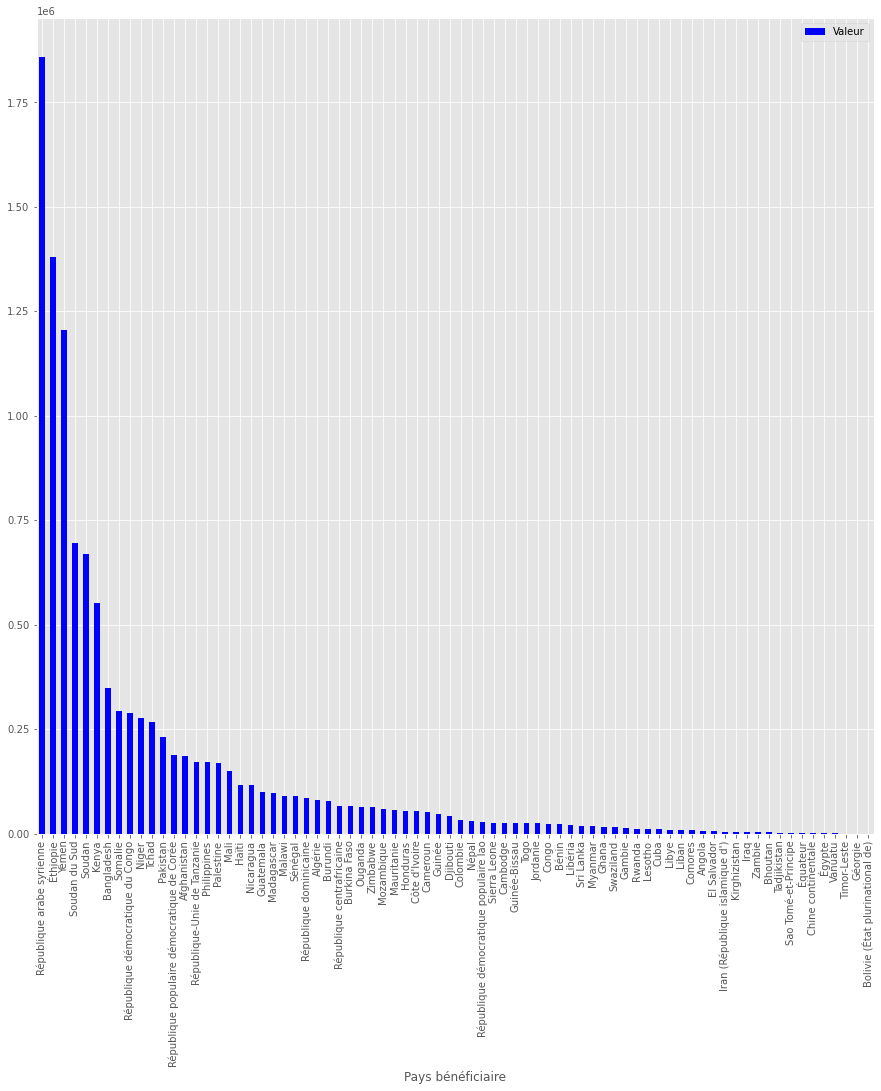

In [166]:
#Affichage de l'aide alimentaire

cumul_aide_alimentaire_df.plot(x="Pays bénéficiaire", y=["Valeur"],color="b", kind="bar", rot=90,figsize=(15,15))
plt.savefig('cumul_aide_alimentaire.png')

In [167]:
#4 - Le nombre théoriques de personnes pouvant être nourries en 2017. En produits animaux et végétaux.
dispo_alimentaire_df

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Brésil,"Sucre, canne",vegetale,13.0,16.47,0.09,0.05,739267.0,6900.0,347309.0,0.0,0.0,3300.0,55047.0,739267.0,0.0,326711.0,0.0
1,Inde,"Sucre, canne",vegetale,8.0,9.54,0.05,0.03,341200.0,6824.0,0.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,0.0
2,États-Unis d'Amérique,Maïs,vegetale,92.0,12.24,0.26,1.67,292776.0,128024.0,137023.0,24655.0,3595.0,3917.0,0.0,353699.0,582.0,23230.0,-39863.0
3,Inde,Lait - Excl Beurre,animale,129.0,84.50,5.65,8.17,133443.0,22757.0,0.0,2175.0,18.0,105807.0,4878.0,135600.0,0.0,0.0,0.0
4,Thaïlande,Manioc,vegetale,40.0,13.00,0.05,0.14,6264.0,1800.0,2081.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Équateur,Miscellanees,vegetale,2.0,0.00,0.02,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,États-Unis d'Amérique,Miscellanees,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15602,Éthiopie,Miscellanees,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Huile de Tournesol,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
#Creation d'une dataframe pour regrouper tout les produits en deux lignes par pays et par origine en faisant la somme de tout les produits pour les calories et les kilos

cumul_dispo_alimentaire_df = pd.DataFrame(dispo_alimentaire_df.groupby(['Zone','Origine'])['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)'].sum())
cumul_dispo_alimentaire_df.reset_index(inplace=True)

cumul_dispo_alimentaire_df

<ipython-input-168-81d9c0a1b24f>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cumul_dispo_alimentaire_df = pd.DataFrame(dispo_alimentaire_df.groupby(['Zone','Origine'])['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)'].sum())


,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,animale,216.0,79.92
1,Afghanistan,vegetale,1871.0,271.49
2,Afrique du Sud,animale,487.0,139.63
3,Afrique du Sud,vegetale,2533.0,425.17
4,Albanie,animale,985.0,389.05
...,...,...,...,...
343,États-Unis d'Amérique,vegetale,2698.0,590.68
344,Éthiopie,animale,124.0,53.56
345,Éthiopie,vegetale,2005.0,300.99
346,Îles Salomon,animale,196.0,61.83


In [169]:
#Transformation de la dataframe dispo alimentaire pour mettre la colonne origine en multi-index.
#Operation necessaire pour ensuite faire les plots des données

cumul_dispo_alimentaire_df_pivoted = cumul_dispo_alimentaire_df.pivot(index="Zone", columns="Origine", values=["Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)"])
cumul_dispo_alimentaire_df_pivoted

Disponibilité alimentaire (Kcal/personne/jour)           \
Origine                                                      animale vegetale   
Zone                                                                            
Afghanistan                                                    216.0   1871.0   
Afrique du Sud                                                 487.0   2533.0   
Albanie                                                        985.0   2203.0   
Algérie                                                        378.0   2915.0   
Allemagne                                                     1042.0   2461.0   
...                                                              ...      ...   
Émirats arabes unis                                            557.0   2718.0   
Équateur                                                       614.0   1732.0   
États-Unis d'Amérique                                          984.0   2698.0   
Éthiopie                                                       124.0   2005.0   
Îles Salomon                                                   196.0   2187.0   

                      Disponibilité alimentaire en quantité (kg/personne/an)  \
Origine                                                              animale   
Zone                                                                           
Afghanistan                                                        79.92       
Afrique du Sud                                                    139.63       
Albanie                                                           389.05       
Algérie                                                           176.78       
Allemagne                                                         388.70       
...                                                                  ...       
Émirats arabes unis                                               227.06       
Équateur                                                          217.70       
États-Unis d'Amérique                                             411.71       
Éthiopie                                                           53.56       
Îles Salomon                                                       61.83       

                                
Origine               vegetale  
Zone                            
Afghanistan             271.49  
Afrique du Sud          425.17  
Albanie                 706.49  
Algérie                 632.35  
Allemagne               568.82  
...                        ...  
Émirats arabes unis     473.18  
Équateur                327.21  
États-Unis d'Amérique   590.68  
Éthiopie                300.99  
Îles Salomon            587.08  

[174 rows x 4 columns]

In [170]:
#On trie les valeurs en fonction de la disponibilité en kg et de provenance vegetale
#Remarque importante, la fonction sort_values sera utilisé pour trier toute les dataframes dans la suite de ce TP

cumul_dispo_alimentaire_df_pivoted = cumul_dispo_alimentaire_df_pivoted.sort_values(("Disponibilité alimentaire en quantité (kg/personne/an)","vegetale"), ascending=False)
cumul_dispo_alimentaire_df_pivoted

Disponibilité alimentaire (Kcal/personne/jour)  \
Origine                                                         animale   
Zone                                                                      
Chine continentale                                               4146.0   
Taiwan Province de Chine                                          154.0   
Ghana                                                             140.0   
Dominique                                                         579.0   
Rwanda                                                             63.0   
...                                                                 ...   
Mauritanie                                                        491.0   
Pakistan                                                          531.0   
Tchad                                                             118.0   
Zimbabwe                                                          178.0   
Afghanistan                                                       216.0   

                                   \
Origine                  vegetale   
Zone                                
Chine continentale        74542.0   
Taiwan Province de Chine   1887.0   
Ghana                      2874.0   
Dominique                  2351.0   
Rwanda                     2161.0   
...                           ...   
Mauritanie                 2384.0   
Pakistan                   1907.0   
Tchad                      1991.0   
Zimbabwe                   1935.0   
Afghanistan                1871.0   

                         Disponibilité alimentaire en quantité (kg/personne/an)  \
Origine                                                                 animale   
Zone                                                                              
Chine continentale                                                   723.00       
Taiwan Province de Chine                                             656.00       
Ghana                                                                 56.10       
Dominique                                                            216.26       
Rwanda                                                                20.50       
...                                                                     ...       
Mauritanie                                                           207.50       
Pakistan                                                             211.33       
Tchad                                                                 40.07       
Zimbabwe                                                              57.67       
Afghanistan                                                           79.92       

                                   
Origine                  vegetale  
Zone                               
Chine continentale        2389.00  
Taiwan Province de Chine  2342.00  
Ghana                      811.85  
Dominique                  790.89  
Rwanda                     766.85  
...                           ...  
Mauritanie                 293.13  
Pakistan                   285.52  
Tchad                      279.38  
Zimbabwe                   278.92  
Afghanistan                271.49  

[174 rows x 4 columns]

In [171]:
#la chine continentale  contient des disponibilitées alimentaires très superieure aux autres pays, il est retiré de la liste pour une meilleur visibilité graphique
cumul_dispo_alimentaire_df_pivoted = cumul_dispo_alimentaire_df_pivoted.drop("Chine continentale", axis=0)
cumul_dispo_alimentaire_df_pivoted

Disponibilité alimentaire (Kcal/personne/jour)  \
Origine                                                         animale   
Zone                                                                      
Taiwan Province de Chine                                          154.0   
Ghana                                                             140.0   
Dominique                                                         579.0   
Rwanda                                                             63.0   
Monténégro                                                       1122.0   
...                                                                 ...   
Mauritanie                                                        491.0   
Pakistan                                                          531.0   
Tchad                                                             118.0   
Zimbabwe                                                          178.0   
Afghanistan                                                       216.0   

                                   \
Origine                  vegetale   
Zone                                
Taiwan Province de Chine   1887.0   
Ghana                      2874.0   
Dominique                  2351.0   
Rwanda                     2161.0   
Monténégro                 2368.0   
...                           ...   
Mauritanie                 2384.0   
Pakistan                   1907.0   
Tchad                      1991.0   
Zimbabwe                   1935.0   
Afghanistan                1871.0   

                         Disponibilité alimentaire en quantité (kg/personne/an)  \
Origine                                                                 animale   
Zone                                                                              
Taiwan Province de Chine                                             656.00       
Ghana                                                                 56.10       
Dominique                                                            216.26       
Rwanda                                                                20.50       
Monténégro                                                           462.81       
...                                                                     ...       
Mauritanie                                                           207.50       
Pakistan                                                             211.33       
Tchad                                                                 40.07       
Zimbabwe                                                              57.67       
Afghanistan                                                           79.92       

                                   
Origine                  vegetale  
Zone                               
Taiwan Province de Chine  2342.00  
Ghana                      811.85  
Dominique                  790.89  
Rwanda                     766.85  
Monténégro                 747.60  
...                           ...  
Mauritanie                 293.13  
Pakistan                   285.52  
Tchad                      279.38  
Zimbabwe                   278.92  
Afghanistan                271.49  

[173 rows x 4 columns]

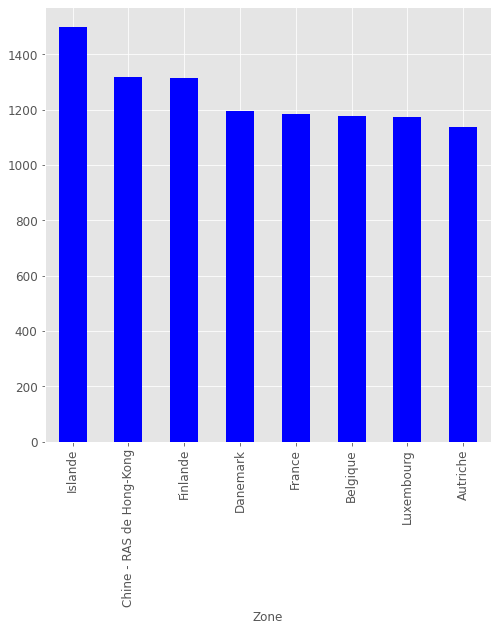

In [202]:
cumul_dispo_alimentaire_df_pivoted = cumul_dispo_alimentaire_df_pivoted.sort_values(("Disponibilité alimentaire (Kcal/personne/jour)","animale"), ascending=False)

#Faisable mais illisible
#cumul_dispo_alimentaire_df_pivoted.plot(y=("Disponibilité alimentaire (Kcal/personne/jour)","animale"),kind='bar',figsize=(30,30)).get_legend().remove()


#on selectionne les 5 pays avec le plus de disponibilité
cumul_dispo_alimentaire_df_pivoted_head = cumul_dispo_alimentaire_df_pivoted.head(n=8)
cumul_dispo_alimentaire_df_pivoted_head.plot(y=("Disponibilité alimentaire (Kcal/personne/jour)","animale"),kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()



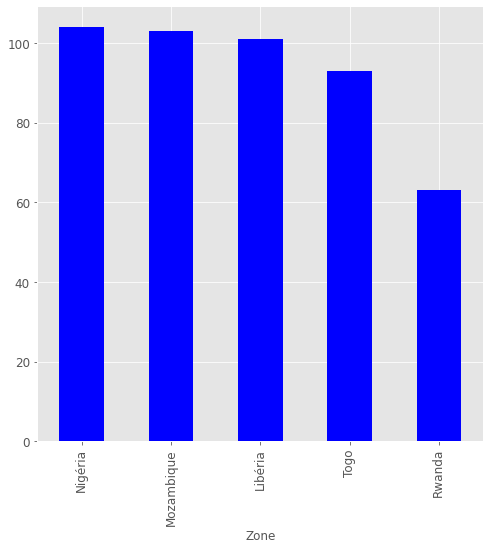

In [173]:
#on selectionne les 5 pays avec le moins de disponibilité
cumul_dispo_alimentaire_df_pivoted_tail = cumul_dispo_alimentaire_df_pivoted.tail(n=5)
cumul_dispo_alimentaire_df_pivoted_tail.plot(y=("Disponibilité alimentaire (Kcal/personne/jour)","animale"),kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()


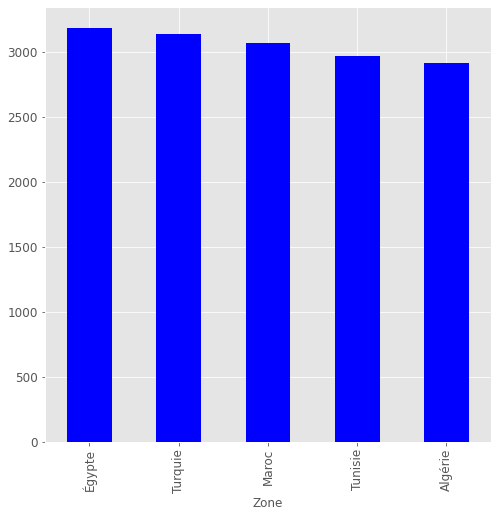

In [174]:
cumul_dispo_alimentaire_df_pivoted_2 = cumul_dispo_alimentaire_df_pivoted.sort_values(("Disponibilité alimentaire (Kcal/personne/jour)","vegetale"), ascending=False)

#Faisable mais illisible
#cumul_dispo_alimentaire_df_pivoted.plot(y=("Disponibilité alimentaire (Kcal/personne/jour)","vegetale"),kind='bar',figsize=(30,30)).get_legend().remove()


#on selectionne les 5 pays avec le plus de disponibilité
cumul_dispo_alimentaire_df_pivoted_head = cumul_dispo_alimentaire_df_pivoted_2.head(n=5)
cumul_dispo_alimentaire_df_pivoted_head.plot(y=("Disponibilité alimentaire (Kcal/personne/jour)","vegetale"),kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()


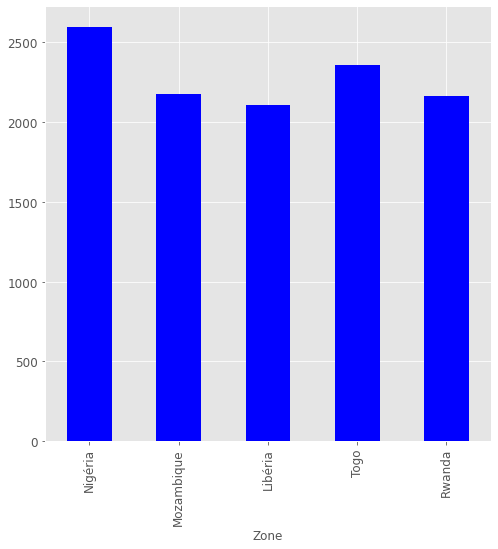

In [175]:
#on selectionne les 5 pays avec le moins de disponibilité
cumul_dispo_alimentaire_df_pivoted_tail_2 = cumul_dispo_alimentaire_df_pivoted.tail(n=5)
cumul_dispo_alimentaire_df_pivoted_tail_2.plot(y=("Disponibilité alimentaire (Kcal/personne/jour)","vegetale"),kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()


In [176]:
#5 - L’utilisation de la disponibilité intérieure (animal et végétal) : 
#Part a l’alimentation humaine
#Part a l’alimentation animale
#Part perdue
dispo_alimentaire_df

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Brésil,"Sucre, canne",vegetale,13.0,16.47,0.09,0.05,739267.0,6900.0,347309.0,0.0,0.0,3300.0,55047.0,739267.0,0.0,326711.0,0.0
1,Inde,"Sucre, canne",vegetale,8.0,9.54,0.05,0.03,341200.0,6824.0,0.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,0.0
2,États-Unis d'Amérique,Maïs,vegetale,92.0,12.24,0.26,1.67,292776.0,128024.0,137023.0,24655.0,3595.0,3917.0,0.0,353699.0,582.0,23230.0,-39863.0
3,Inde,Lait - Excl Beurre,animale,129.0,84.50,5.65,8.17,133443.0,22757.0,0.0,2175.0,18.0,105807.0,4878.0,135600.0,0.0,0.0,0.0
4,Thaïlande,Manioc,vegetale,40.0,13.00,0.05,0.14,6264.0,1800.0,2081.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Équateur,Miscellanees,vegetale,2.0,0.00,0.02,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,États-Unis d'Amérique,Miscellanees,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15602,Éthiopie,Miscellanees,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Huile de Tournesol,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
#Exemple de visualisation pour un seul pays
dispo_alimentaire_df[dispo_alimentaire_df["Zone"]=="États-Unis d'Amérique"]

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2,États-Unis d'Amérique,Maïs,vegetale,92.0,12.24,0.26,1.67,292776.0,128024.0,137023.0,24655.0,3595.0,3917.0,0.0,353699.0,582.0,23230.0,-39863.0
6,États-Unis d'Amérique,Lait - Excl Beurre,animale,368.0,254.69,22.15,21.94,87965.0,481.0,5972.0,10756.0,5235.0,81513.0,0.0,91277.0,0.0,0.0,2210.0
13,États-Unis d'Amérique,Soja,vegetale,0.0,0.04,0.00,0.02,52672.0,2240.0,0.0,39184.0,1267.0,12.0,591.0,91389.0,2640.0,47189.0,-800.0
25,États-Unis d'Amérique,Blé,vegetale,599.0,80.43,2.85,19.35,34051.0,6196.0,16.0,34691.0,5491.0,25742.0,0.0,57967.0,2096.0,0.0,5284.0
33,États-Unis d'Amérique,"Sucre, betterave",vegetale,0.0,0.00,0.00,0.00,29804.0,0.0,0.0,5.0,63.0,0.0,0.0,29746.0,0.0,29804.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11018,États-Unis d'Amérique,Huiles de Foie de Poisso,animale,0.0,0.00,0.00,0.00,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
15166,États-Unis d'Amérique,Palmistes,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15327,États-Unis d'Amérique,Aliments pour enfants,vegetale,0.0,0.00,0.00,0.00,-35.0,0.0,0.0,37.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
15345,États-Unis d'Amérique,"Plantes Oleiferes, Autre",vegetale,0.0,0.02,0.02,0.01,-3430.0,0.0,36.0,3869.0,263.0,7.0,0.0,178.0,8.0,315.0,-1.0


In [178]:
#Creation d'une dataframe pour regrouper tout les produits en une seule ligne par pays en faisant la somme de : la disponibilité interieure, aliments pour animaux, nourritures et pertes

cumul_dispo_alimentaire_part_df = pd.DataFrame(dispo_alimentaire_df.groupby(['Zone'])["Disponibilité intérieure","Aliments pour animaux","Nourriture","Pertes"].sum())

cumul_dispo_alimentaire_part_df



<ipython-input-178-dc4031a09e5d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cumul_dispo_alimentaire_part_df = pd.DataFrame(dispo_alimentaire_df.groupby(['Zone'])["Disponibilité intérieure","Aliments pour animaux","Nourriture","Pertes"].sum())


,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes
Zone,,,,
Afghanistan,13515.0,768.0,10735.0,1135.0
Afrique du Sud,61256.0,5309.0,29812.0,2193.0
Albanie,4758.0,660.0,3476.0,276.0
Algérie,42630.0,4352.0,31729.0,3753.0
Allemagne,162275.0,30209.0,79238.0,3781.0
...,...,...,...,...
Émirats arabes unis,11850.0,1174.0,6548.0,705.0
Équateur,18614.0,1200.0,8574.0,707.0
États-Unis d'Amérique,777992.0,148432.0,320889.0,7162.0


In [179]:

#Calcul des proportions des distributions de Nourriture, Aliments pour animaux et pertes en utilisant la disponibilité interieur comme reference

cumul_dispo_alimentaire_part_df["Nourriture part"] = round((cumul_dispo_alimentaire_part_df["Nourriture"]/cumul_dispo_alimentaire_part_df["Disponibilité intérieure"])*100,2)
cumul_dispo_alimentaire_part_df["Aliments pour animaux part"] = round((cumul_dispo_alimentaire_part_df["Aliments pour animaux"]/cumul_dispo_alimentaire_part_df["Disponibilité intérieure"])*100,2)
cumul_dispo_alimentaire_part_df["Pertes part"] = round((cumul_dispo_alimentaire_part_df["Pertes"]/cumul_dispo_alimentaire_part_df["Disponibilité intérieure"])*100,2)
cumul_dispo_alimentaire_part_df.reset_index(inplace=True)

#la chine continentale  contient des disponibilitées alimentaires très superieure aux autres pays, il est retiré de la liste pour une meilleur visibilité graphique
cumul_dispo_alimentaire_part_df = cumul_dispo_alimentaire_part_df[cumul_dispo_alimentaire_part_df["Zone"]!="Chine continentale"]


#Taiwan Province de Chine possede des valeurs incoherente, elle est retiré
cumul_dispo_alimentaire_part_df = cumul_dispo_alimentaire_part_df[cumul_dispo_alimentaire_part_df["Zone"]!="Taiwan Province de Chine"]


#cumul_dispo_alimentaire_df_pivoted_2 = cumul_dispo_alimentaire_df_pivoted.sort_values(("Disponibilité alimentaire (Kcal/personne/jour)","vegetale"), ascending=False)
cumul_dispo_alimentaire_part_df = cumul_dispo_alimentaire_part_df.sort_values(["Nourriture part","Aliments pour animaux part","Pertes part"], ascending=False)


cumul_dispo_alimentaire_part_df

,Zone,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes,Nourriture part,Aliments pour animaux part,Pertes part
34,Chine - RAS de Macao,383.0,0.0,368.0,1.0,96.08,0.00,0.26
154,Timor-Leste,447.0,9.0,419.0,14.0,93.74,2.01,3.13
165,Yémen,9782.0,210.0,9162.0,269.0,93.66,2.15,2.75
83,Lesotho,966.0,1.0,899.0,51.0,93.06,0.10,5.28
126,Rwanda,10054.0,0.0,9273.0,435.0,92.23,0.00,4.33
...,...,...,...,...,...,...,...,...
97,Maurice,4767.0,102.0,794.0,15.0,16.66,2.14,0.31
62,Guyana,3290.0,310.0,532.0,186.0,16.17,9.42,5.65
23,Brésil,1033314.0,63740.0,156246.0,75914.0,15.12,6.17,7.35
17,Belize,1542.0,64.0,211.0,21.0,13.68,4.15,1.36


<AxesSubplot:xlabel='Zone'>

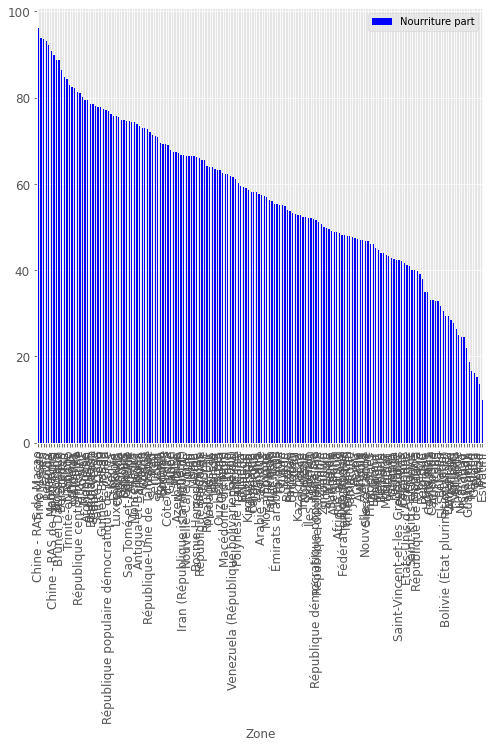

In [180]:
#Affichage uniquement de la part de nourriture pour l'alimentation humaine

#faisable mais illisible
cumul_dispo_alimentaire_part_df.plot(x="Zone",y=["Nourriture part"],kind='bar',figsize=(8,8),fontsize=12,color="b")


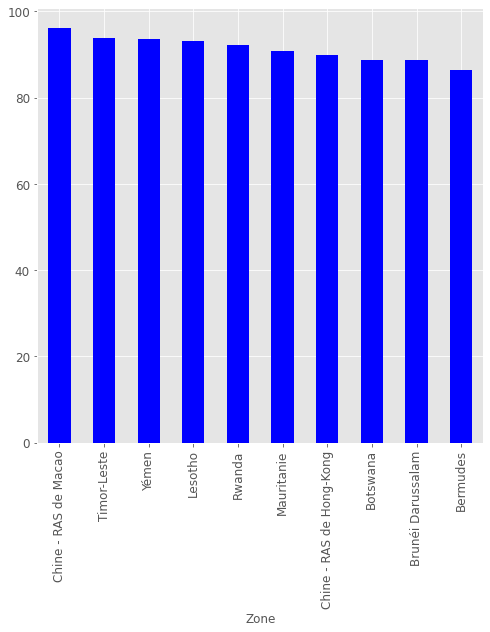

In [181]:
#on selectionne les 5 pays avec les plus grandes parts de disponibilité de l'alimentation
cumul_dispo_alimentaire_part_df_head_2 = cumul_dispo_alimentaire_part_df.head(n=10)
cumul_dispo_alimentaire_part_df_head_2.plot(x="Zone",y=["Nourriture part"],kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()


<AxesSubplot:xlabel='Zone'>

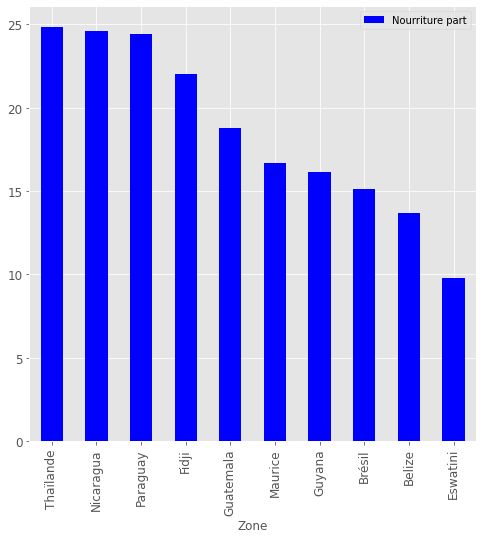

In [182]:
#on selectionne les 5 pays avec les plus petites parts de disponibilité de l'alimentation
cumul_dispo_alimentaire_part_df_tail_2 = cumul_dispo_alimentaire_part_df.tail(n=10)
cumul_dispo_alimentaire_part_df_tail_2.plot(x="Zone",y=["Nourriture part"],kind='bar',figsize=(8,8),fontsize=12,color="b")


<AxesSubplot:xlabel='Zone'>

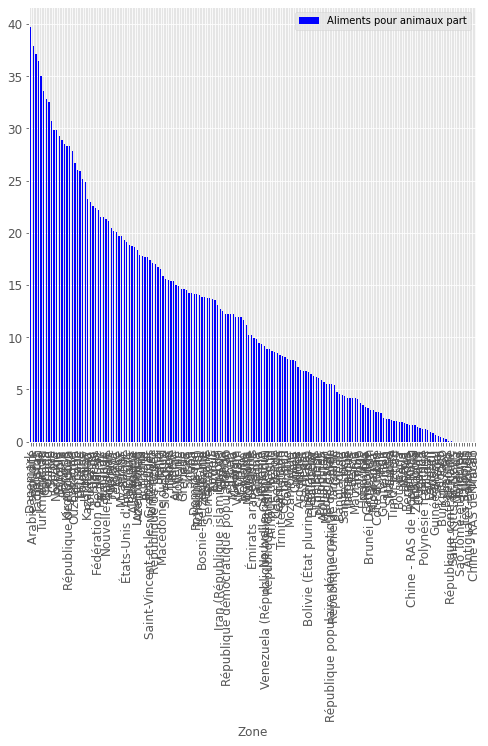

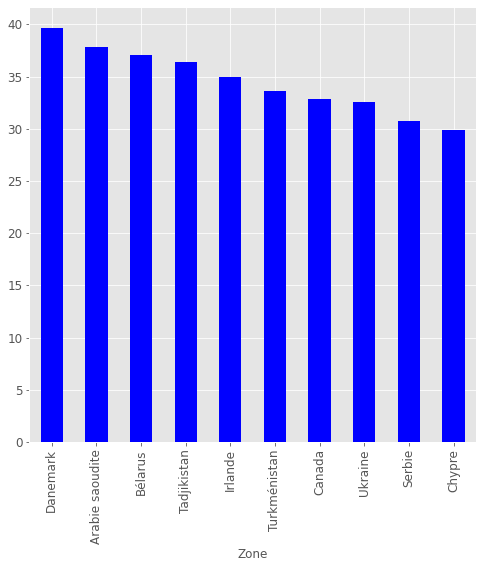

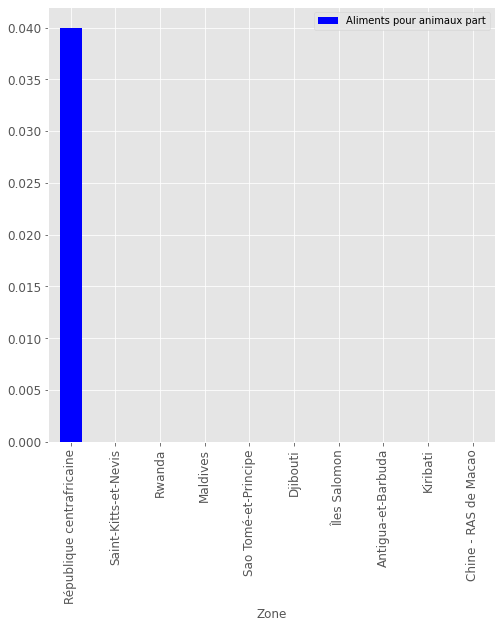

In [183]:
#Affichage uniquement de la part de nourriture pour l'alimentation animal
cumul_dispo_alimentaire_part_df = cumul_dispo_alimentaire_part_df.sort_values(["Aliments pour animaux part"], ascending=False)

cumul_dispo_alimentaire_part_df.plot(x="Zone",y=["Aliments pour animaux part"],kind='bar',figsize=(8,8),fontsize=12,color="b")
#on selectionne les 5 pays avec le moins de disponibilité

cumul_dispo_alimentaire_part_df_head_2 = cumul_dispo_alimentaire_part_df.head(n=10)
cumul_dispo_alimentaire_part_df_head_2.plot(x="Zone",y=["Aliments pour animaux part"],kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()


#on selectionne les 5 pays avec le moins de disponibilité
cumul_dispo_alimentaire_part_df_tail_2 = cumul_dispo_alimentaire_part_df.tail(n=10)
cumul_dispo_alimentaire_part_df_tail_2.plot(x="Zone",y=["Aliments pour animaux part"],kind='bar',figsize=(8,8),fontsize=12,color="b")



<AxesSubplot:xlabel='Zone'>

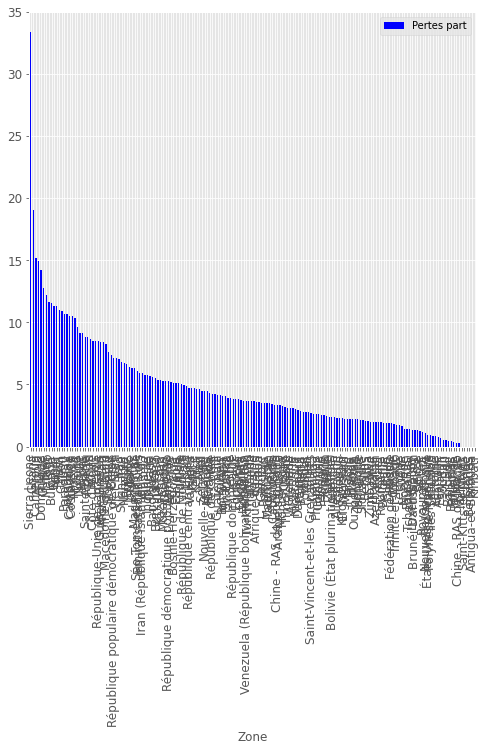

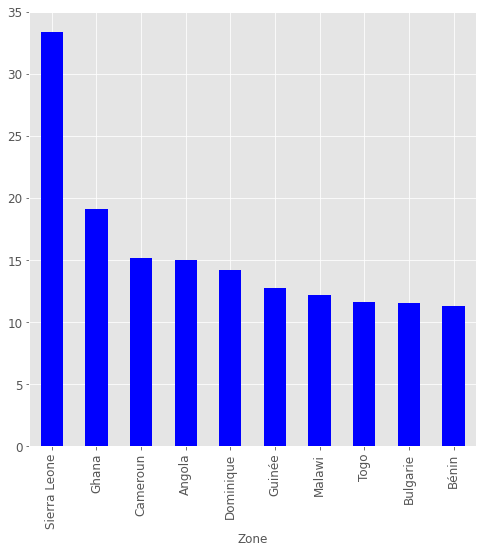

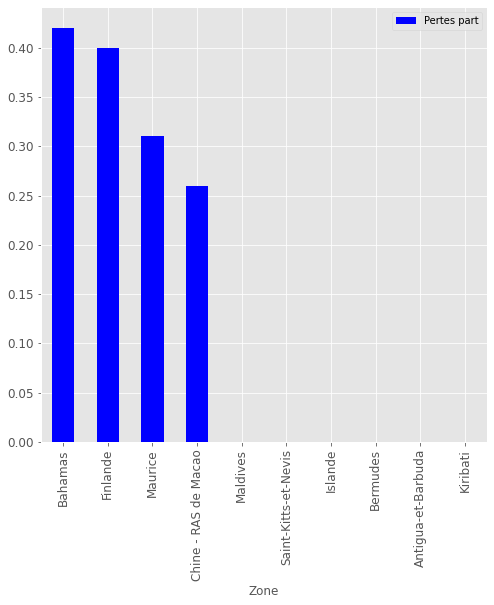

In [184]:
#Affichage uniquement de la part des pertes de nourritures

cumul_dispo_alimentaire_part_df = cumul_dispo_alimentaire_part_df.sort_values(["Pertes part"], ascending=False)


cumul_dispo_alimentaire_part_df.plot(x="Zone",y=["Pertes part"],kind='bar',figsize=(8,8),fontsize=12,color="b")
#on selectionne les 5 pays avec le moins de disponibilité

cumul_dispo_alimentaire_part_df_head_2 = cumul_dispo_alimentaire_part_df.head(n=10)
cumul_dispo_alimentaire_part_df_head_2.plot(x="Zone",y=["Pertes part"],kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()


#on selectionne les 5 pays avec le moins de disponibilité
cumul_dispo_alimentaire_part_df_tail_2 = cumul_dispo_alimentaire_part_df.tail(n=10)
cumul_dispo_alimentaire_part_df_tail_2.plot(x="Zone",y=["Pertes part"],kind='bar',figsize=(8,8),fontsize=12,color="b")


In [185]:
#6 autres exemple de cas d'usage et de visualisation

#Analyse de la repartition de cereales pour l'alimentation humaine et d'animaux

dispo_alimentaire_df_cereales = dispo_alimentaire_df[dispo_alimentaire_df["Produit"]=="Céréales, Autres"]
dispo_alimentaire_df_cereales = dispo_alimentaire_df_cereales.drop(["Origine","Produit"],axis=1)
dispo_alimentaire_df_cereales


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
176,Pologne,18.0,2.29,0.07,0.38,7171.0,6238.0,280.0,205.0,17.0,88.0,145.0,7404.0,419.0,0.0,-45.0
377,Éthiopie,254.0,26.52,0.77,6.97,3274.0,0.0,469.0,0.0,2.0,2495.0,234.0,4672.0,76.0,0.0,-1400.0
437,Allemagne,5.0,0.68,0.01,0.13,2778.0,2373.0,228.0,271.0,298.0,56.0,53.0,2690.0,68.0,0.0,60.0
471,France,7.0,0.73,0.03,0.20,2527.0,2421.0,0.0,109.0,76.0,47.0,0.0,2559.0,59.0,0.0,0.0
779,Fédération de Russie,1.0,0.10,0.00,0.02,1414.0,1304.0,0.0,40.0,3.0,15.0,34.0,1451.0,61.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15281,Zambie,0.0,0.00,0.00,0.00,-3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15297,Pakistan,0.0,0.00,0.00,0.00,-6.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15332,Émirats arabes unis,0.0,0.00,0.00,0.00,-40.0,1.0,1.0,59.0,21.0,0.0,0.0,0.0,0.0,0.0,-1.0
15337,Inde,0.0,0.00,0.00,0.00,-62.0,0.0,0.0,62.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
#Creation d'une dataframe pour regrouper tout les produits en une seule ligne par pays en faisant la somme de : la disponibilité interieure, aliments pour animaux, nourritures et pertes

dispo_alimentaire_df_cereales_part = pd.DataFrame(dispo_alimentaire_df_cereales.groupby(['Zone'])["Disponibilité intérieure","Aliments pour animaux","Nourriture","Pertes"].sum())

dispo_alimentaire_df_cereales_part

<ipython-input-186-461e2aff8670>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dispo_alimentaire_df_cereales_part = pd.DataFrame(dispo_alimentaire_df_cereales.groupby(['Zone'])["Disponibilité intérieure","Aliments pour animaux","Nourriture","Pertes"].sum())


,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes
Zone,,,,
Afghanistan,0.0,0.0,0.0,0.0
Afrique du Sud,12.0,8.0,4.0,0.0
Albanie,0.0,0.0,0.0,0.0
Algérie,4.0,2.0,1.0,0.0
Allemagne,2778.0,2373.0,56.0,53.0
...,...,...,...,...
Émirats arabes unis,-40.0,1.0,0.0,0.0
Équateur,2.0,1.0,1.0,0.0
États-Unis d'Amérique,271.0,77.0,200.0,0.0


In [187]:
#Calcul des proportions pour chaque colonnes en utilisant la disponibilité interieure comme reference

dispo_alimentaire_df_cereales_part["Nourriture part"] = round((dispo_alimentaire_df_cereales_part["Nourriture"]/dispo_alimentaire_df_cereales_part["Disponibilité intérieure"])*100,2)

dispo_alimentaire_df_cereales_part["Aliments pour animaux part"] = round((dispo_alimentaire_df_cereales_part["Aliments pour animaux"]/dispo_alimentaire_df_cereales_part["Disponibilité intérieure"])*100,2)

dispo_alimentaire_df_cereales_part["Pertes part"] = round((dispo_alimentaire_df_cereales_part["Pertes"]/dispo_alimentaire_df_cereales_part["Disponibilité intérieure"])*100,2)

dispo_alimentaire_df_cereales_part.reset_index(inplace=True)

dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part.fillna(0)

dispo_alimentaire_df_cereales_part

,Zone,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes,Nourriture part,Aliments pour animaux part,Pertes part
0,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,Afrique du Sud,12.0,8.0,4.0,0.0,33.33,66.67,0.00
2,Albanie,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,Algérie,4.0,2.0,1.0,0.0,25.00,50.00,0.00
4,Allemagne,2778.0,2373.0,56.0,53.0,2.02,85.42,1.91
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,-40.0,1.0,0.0,0.0,-0.00,-2.50,-0.00
168,Équateur,2.0,1.0,1.0,0.0,50.00,50.00,0.00
169,États-Unis d'Amérique,271.0,77.0,200.0,0.0,73.80,28.41,0.00
170,Éthiopie,3274.0,0.0,2495.0,234.0,76.21,0.00,7.15


<AxesSubplot:xlabel='Zone'>

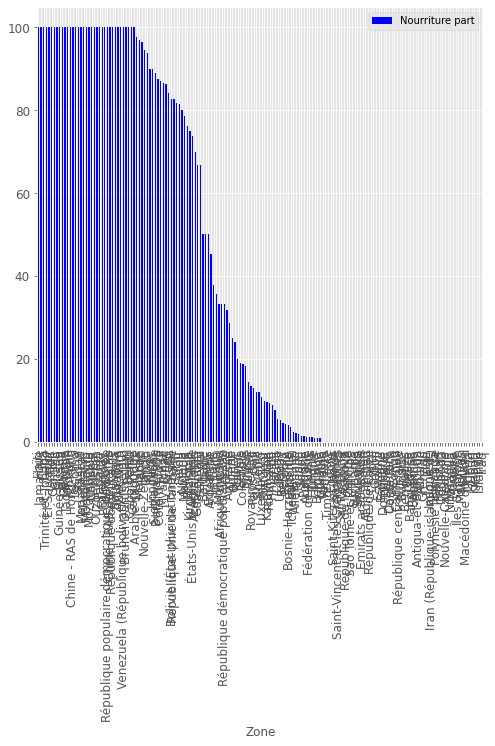

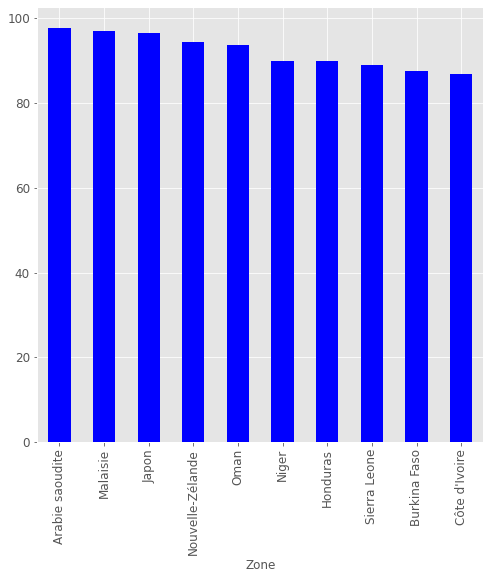

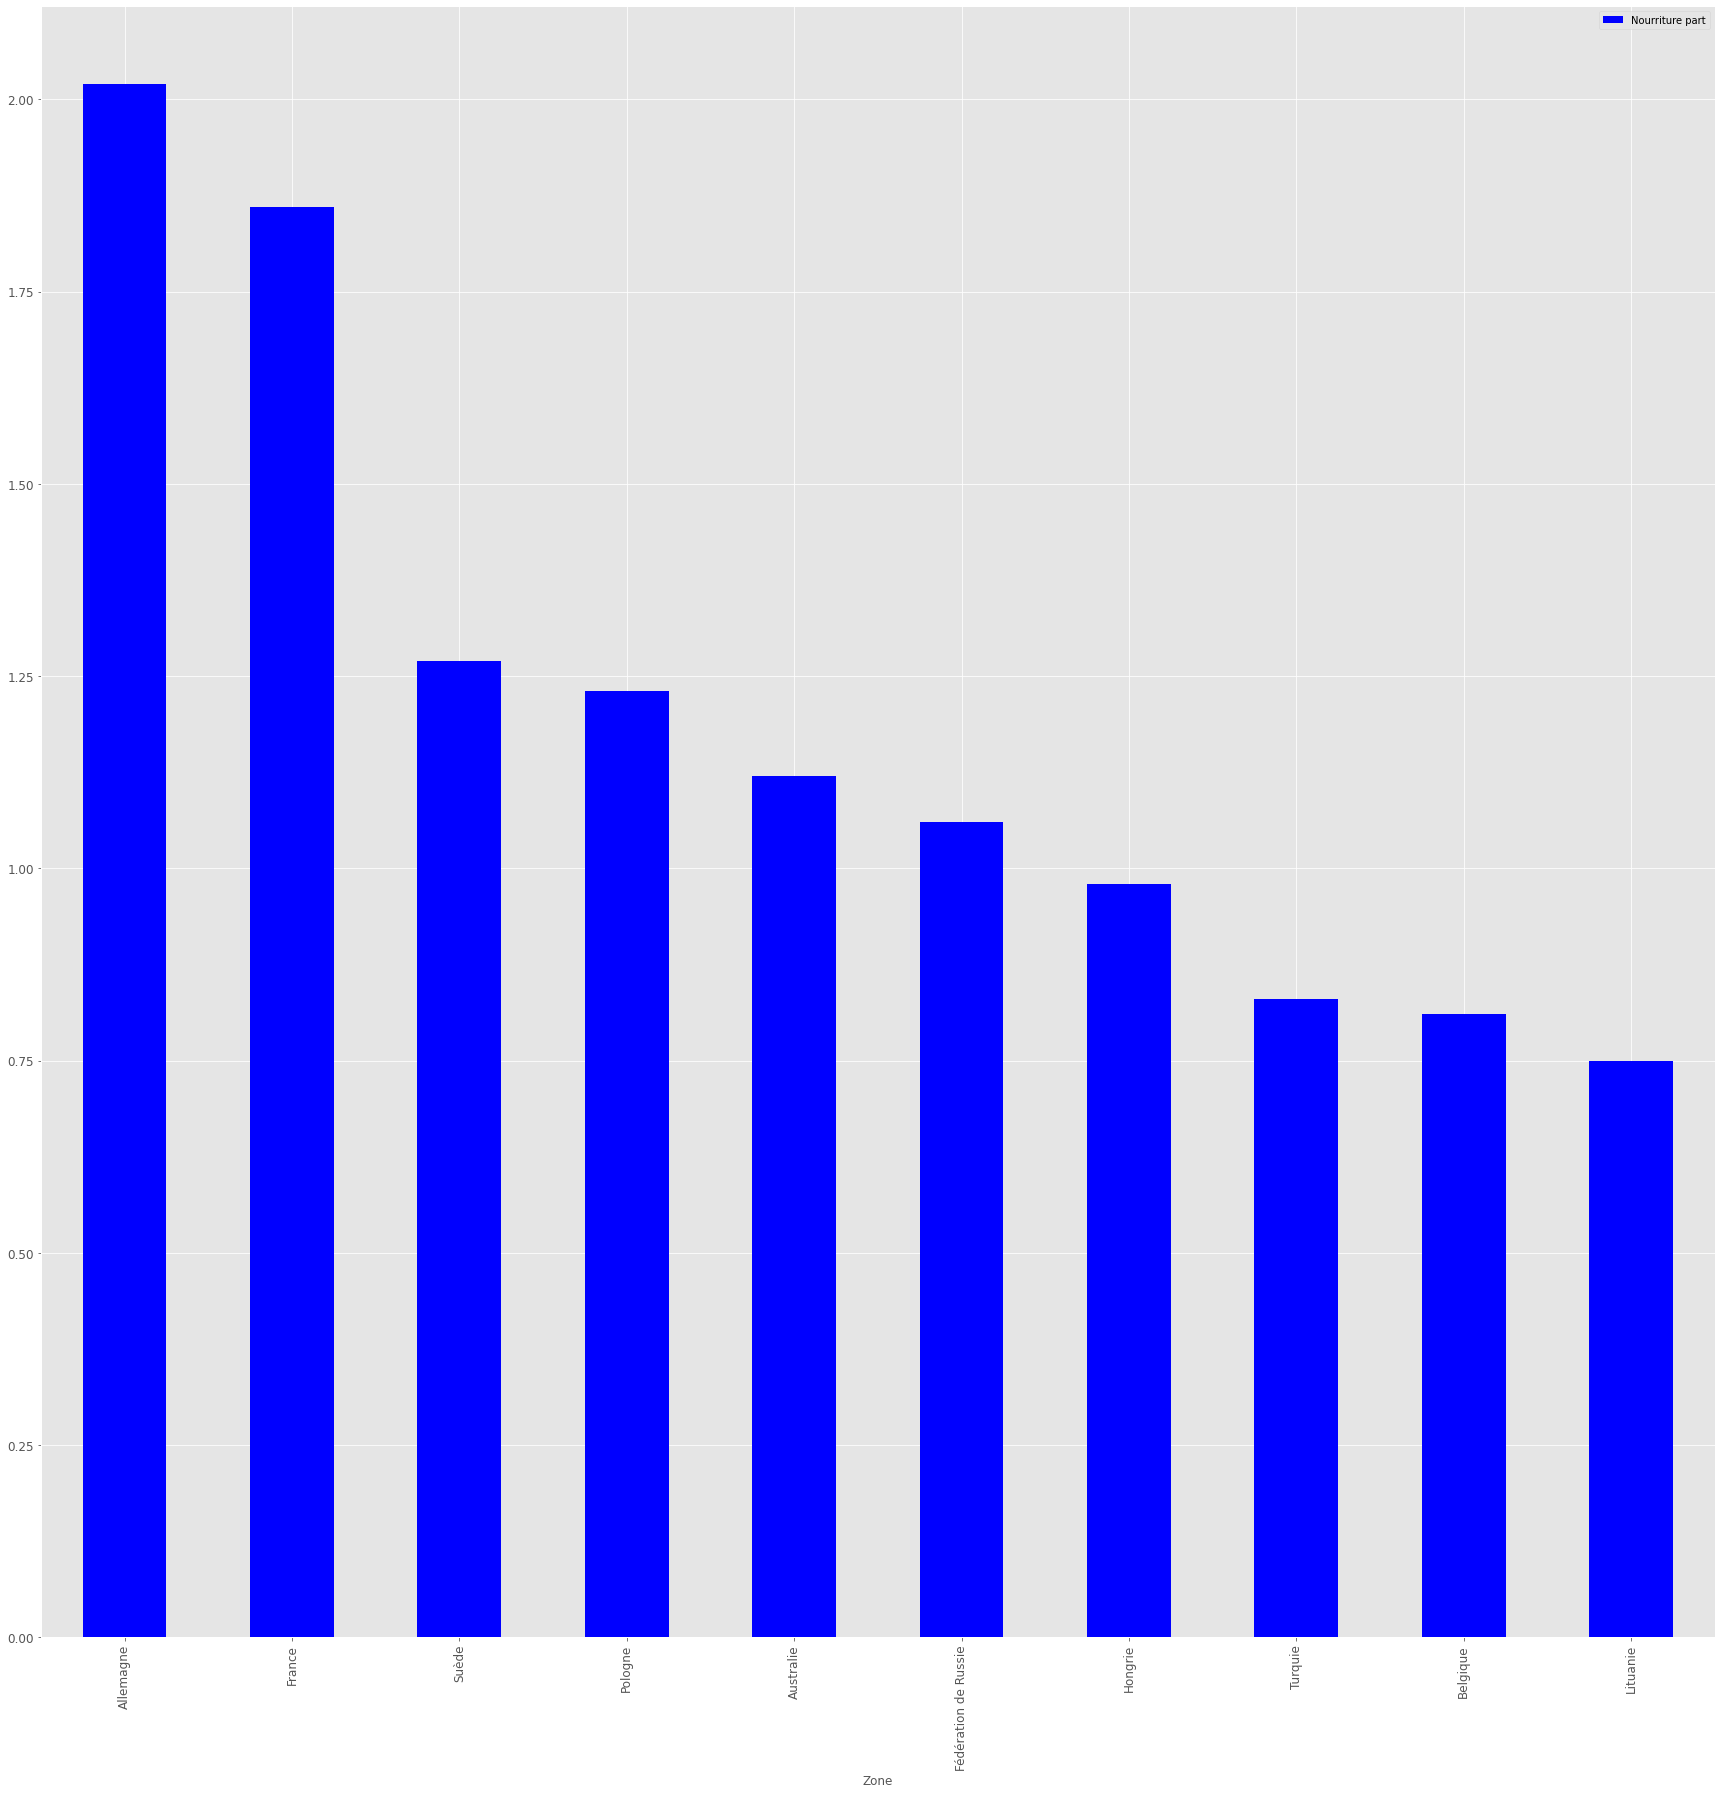

In [188]:
#Trie en fonction de la part de nourriture 

dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part.sort_values(["Nourriture part"], ascending=False)

#Suppression des valeures extremes et abberantes
dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Chine continentale"]
dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Taiwan Province de Chine"]
dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Togo"]
dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Canada"]


dispo_alimentaire_df_cereales_part.plot(x="Zone",y=["Nourriture part"],kind='bar',figsize=(8,8),fontsize=12,color="b")


dispo_alimentaire_df_cereales_part_normal = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Nourriture part"]<100]
dispo_alimentaire_df_cereales_part_normal = dispo_alimentaire_df_cereales_part_normal[dispo_alimentaire_df_cereales_part_normal["Nourriture part"]!=0]

#on selectionne les 5 pays avec le plus de part de nourriture

dispo_alimentaire_df_cereales_part_df_head = dispo_alimentaire_df_cereales_part_normal.head(n=10)
dispo_alimentaire_df_cereales_part_df_head.plot(x="Zone",y=["Nourriture part"],kind='bar',figsize=(8,8),fontsize=12,color="b").get_legend().remove()


#on selectionne les 5 pays avec le moins de part de nourriture
dispo_alimentaire_df_cereales_part_df_tail = dispo_alimentaire_df_cereales_part_normal.tail(n=10)
dispo_alimentaire_df_cereales_part_df_tail.plot(x="Zone",y=["Nourriture part"],kind='bar',figsize=(30,30),fontsize=12,color="b")

<AxesSubplot:xlabel='Zone'>

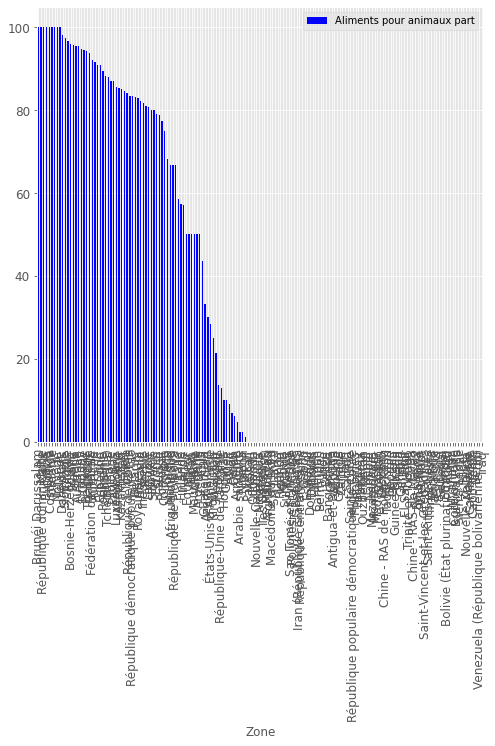

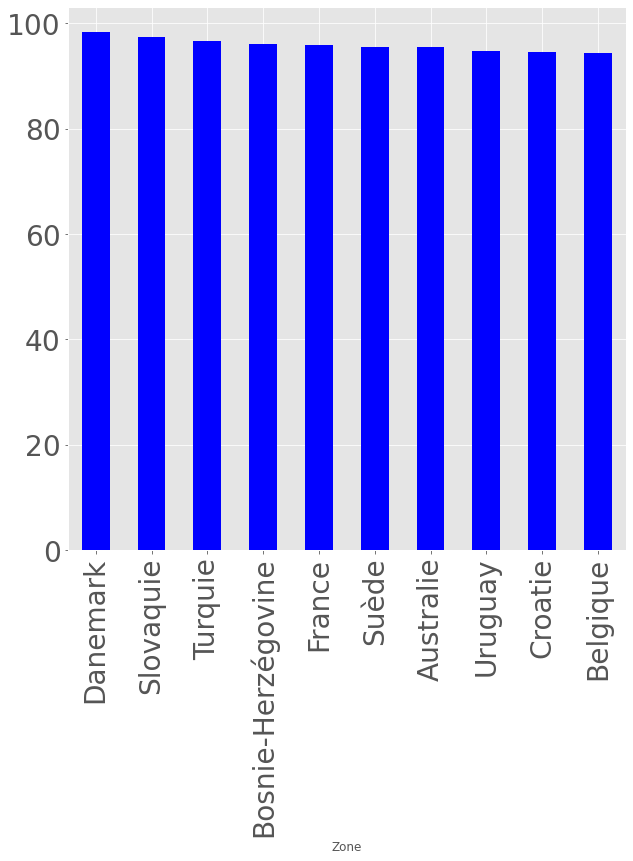

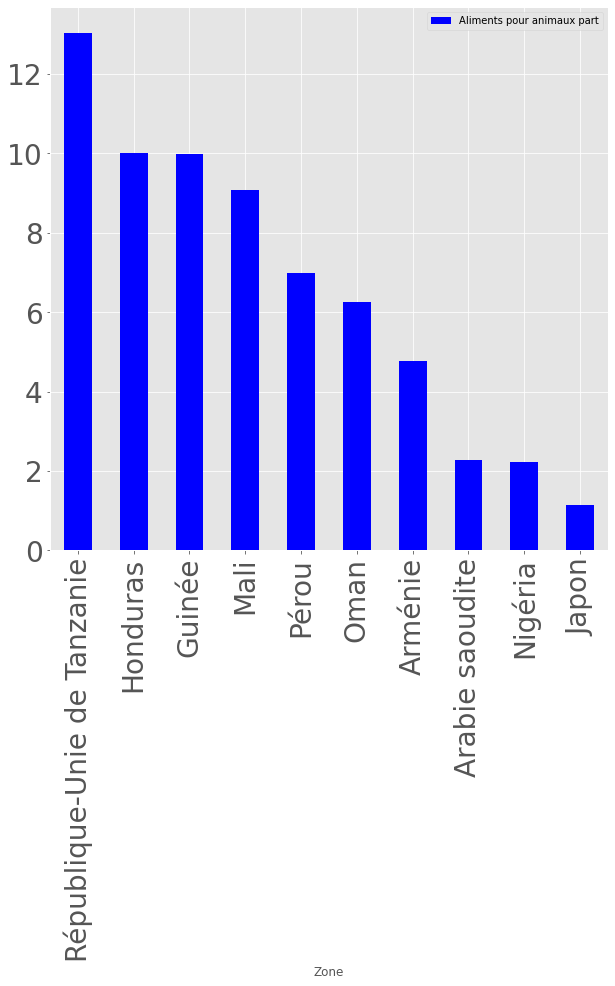

In [189]:
### Trie en fonction de la part de nourriture pour animaux

dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part.sort_values(["Aliments pour animaux part"], ascending=False)

#Suppression des valeures extremes et abberantes
dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Égypte"]
dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Émirats arabes unis"]

#dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Togo"]
#dispo_alimentaire_df_cereales_part = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Zone"]!="Canada"]


dispo_alimentaire_df_cereales_part.plot(x="Zone",y=["Aliments pour animaux part"],kind='bar',figsize=(8,8),fontsize=12,color="b")


#on selectionne les 5 pays avec le plus de part de nourriture pour animaux
dispo_alimentaire_df_cereales_part_normal = dispo_alimentaire_df_cereales_part[dispo_alimentaire_df_cereales_part["Aliments pour animaux part"]<100]
dispo_alimentaire_df_cereales_part_normal = dispo_alimentaire_df_cereales_part_normal[dispo_alimentaire_df_cereales_part_normal["Aliments pour animaux part"]!=0]

dispo_alimentaire_df_cereales_part_df_head = dispo_alimentaire_df_cereales_part_normal.head(n=10)
dispo_alimentaire_df_cereales_part_df_head.plot(x="Zone",y=["Aliments pour animaux part"],kind='bar',figsize=(10,10),fontsize=28,color="b").get_legend().remove()


#on selectionne les 5 pays avec le moins de part de nourriture pour animaux
dispo_alimentaire_df_cereales_part_df_tail = dispo_alimentaire_df_cereales_part_normal.tail(n=10)
dispo_alimentaire_df_cereales_part_df_tail.plot(x="Zone",y=["Aliments pour animaux part"],kind='bar',figsize=(10,10),fontsize=28,color="b")

<AxesSubplot:xlabel='Zone'>

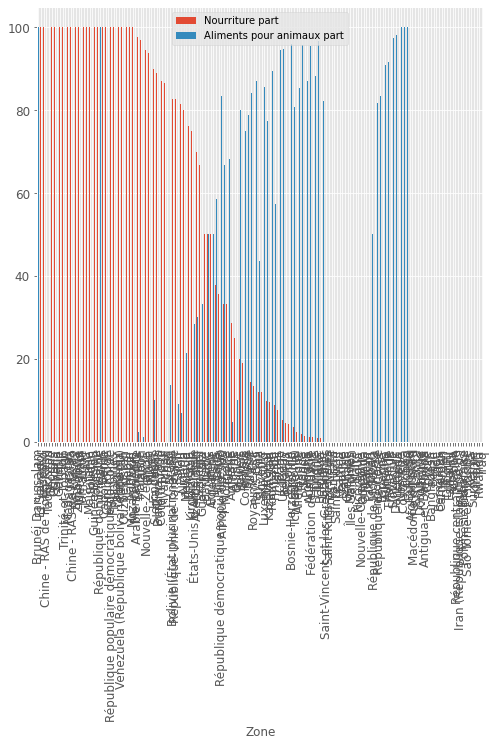

In [190]:
dispo_alimentaire_df_cereales_part_1 = dispo_alimentaire_df_cereales_part.sort_values(["Nourriture part"], ascending=False)

#suppresion des valeurs abberantes
dispo_alimentaire_df_cereales_part_1 = dispo_alimentaire_df_cereales_part_1[dispo_alimentaire_df_cereales_part_1["Zone"]!="Chine continentale"]
dispo_alimentaire_df_cereales_part_1 = dispo_alimentaire_df_cereales_part_1[dispo_alimentaire_df_cereales_part_1["Zone"]!="Taiwan Province de Chine"]
dispo_alimentaire_df_cereales_part_1 = dispo_alimentaire_df_cereales_part_1[dispo_alimentaire_df_cereales_part_1["Zone"]!="Togo"]
dispo_alimentaire_df_cereales_part_1 = dispo_alimentaire_df_cereales_part_1[dispo_alimentaire_df_cereales_part_1["Zone"]!="Canada"]
dispo_alimentaire_df_cereales_part_1 = dispo_alimentaire_df_cereales_part_1[dispo_alimentaire_df_cereales_part_1["Zone"]!="Égypte"]
dispo_alimentaire_df_cereales_part_1 = dispo_alimentaire_df_cereales_part_1[dispo_alimentaire_df_cereales_part_1["Zone"]!="Émirats arabes unis"]

dispo_alimentaire_df_cereales_part_1.plot(x="Zone",y=["Nourriture part","Aliments pour animaux part"],kind='bar',figsize=(8,8),fontsize=12)

<AxesSubplot:xlabel='Zone'>

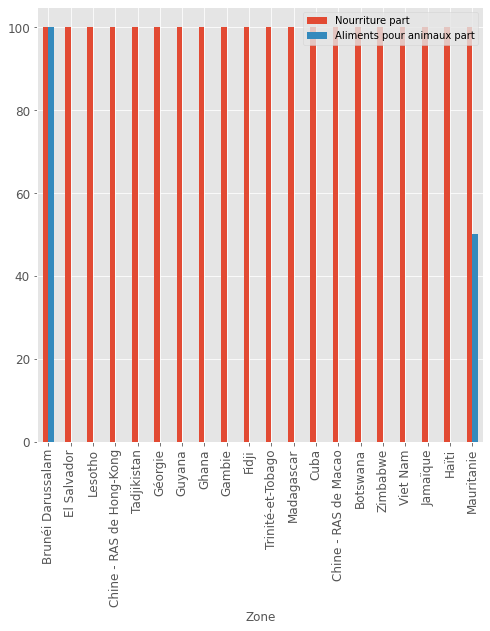

In [191]:
#Affichage des 20 premiers pays qui utilisent la plus la nourriture 
dispo_alimentaire_df_cereales_part_1.head(20).plot(x="Zone",y=["Nourriture part","Aliments pour animaux part"],kind='bar',figsize=(8,8),fontsize=12)

<AxesSubplot:xlabel='Zone'>

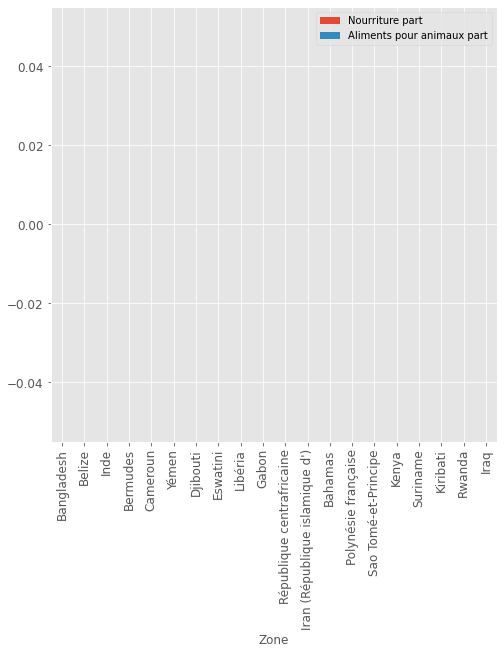

In [192]:
#Affichage des 20 premiers pays qui utilisent le moins la nourriture 
dispo_alimentaire_df_cereales_part_1.tail(20).plot(x="Zone",y=["Nourriture part","Aliments pour animaux part"],kind='bar',figsize=(8,8),fontsize=12)

In [193]:
#manioc de tailande
dispo_alimentaire_df

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Brésil,"Sucre, canne",vegetale,13.0,16.47,0.09,0.05,739267.0,6900.0,347309.0,0.0,0.0,3300.0,55047.0,739267.0,0.0,326711.0,0.0
1,Inde,"Sucre, canne",vegetale,8.0,9.54,0.05,0.03,341200.0,6824.0,0.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,0.0
2,États-Unis d'Amérique,Maïs,vegetale,92.0,12.24,0.26,1.67,292776.0,128024.0,137023.0,24655.0,3595.0,3917.0,0.0,353699.0,582.0,23230.0,-39863.0
3,Inde,Lait - Excl Beurre,animale,129.0,84.50,5.65,8.17,133443.0,22757.0,0.0,2175.0,18.0,105807.0,4878.0,135600.0,0.0,0.0,0.0
4,Thaïlande,Manioc,vegetale,40.0,13.00,0.05,0.14,6264.0,1800.0,2081.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Équateur,Miscellanees,vegetale,2.0,0.00,0.02,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,États-Unis d'Amérique,Miscellanees,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15602,Éthiopie,Miscellanees,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Huile de Tournesol,vegetale,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
dispo_alimentaire_df_thailande = dispo_alimentaire_df[dispo_alimentaire_df["Zone"]=="Thaïlande"]
dispo_alimentaire_df_thailande_manioc = dispo_alimentaire_df_thailande[dispo_alimentaire_df_thailande["Produit"]=="Manioc"]
dispo_alimentaire_df_thailande_manioc

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
4,Thaïlande,Manioc,vegetale,40.0,13.0,0.05,0.14,6264.0,1800.0,2081.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [195]:
pop_nut_2017_thailande = pop_nut_2017[pop_nut_2017["Zone"]=="Thaïlande"]
pop_nut_2017_thailande

,Zone,Population_mondiale,Population_en_malnutrition,Proportion_mal_nutrition
50,Thaïlande,69.20981,6.2,8.958268


In [196]:
str(round(float(dispo_alimentaire_df_thailande_manioc["Exportations - Quantité"]/dispo_alimentaire_df_thailande_manioc["Production"])*100,2))+" %"

'83.41 %'

In [197]:
dispo_alimentaire_df[dispo_alimentaire_df["Zone"]=="Thaïlande"].sort_values(["Exportations - Quantité"], ascending=False)

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
4,Thaïlande,Manioc,vegetale,40.0,13.00,0.05,0.14,6264.0,1800.0,2081.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0
83,Thaïlande,Riz (Eq Blanchi),vegetale,1139.0,114.57,2.50,19.97,13605.0,2405.0,0.0,6860.0,50.0,7677.0,1786.0,24054.0,606.0,1130.0,-3638.0
203,Thaïlande,Sucre Eq Brut,vegetale,368.0,37.69,0.00,0.00,2527.0,0.0,0.0,6462.0,25.0,2526.0,0.0,10024.0,0.0,1.0,-1060.0
264,Thaïlande,"Fruits, Autres",vegetale,63.0,57.56,0.56,0.72,3791.0,0.0,0.0,2671.0,261.0,3857.0,396.0,6141.0,0.0,6.0,60.0
321,Thaïlande,Ananas,vegetale,10.0,10.02,0.04,0.08,782.0,0.0,0.0,1449.0,9.0,671.0,110.0,2209.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,Thaïlande,Huile de Sésame,vegetale,7.0,0.28,0.77,0.00,19.0,0.0,0.0,0.0,0.0,19.0,0.0,19.0,0.0,0.0,0.0
8133,Thaïlande,Huile d'Arachide,vegetale,9.0,0.36,0.98,0.00,24.0,0.0,0.0,0.0,0.0,24.0,0.0,24.0,0.0,0.0,0.0
7334,Thaïlande,Orge,vegetale,0.0,0.00,0.00,0.00,441.0,0.0,0.0,0.0,335.0,0.0,0.0,95.0,1.0,440.0,11.0
6977,Thaïlande,"Sucre, canne",vegetale,49.0,61.11,0.33,0.17,100096.0,0.0,0.0,0.0,0.0,4095.0,1001.0,100096.0,0.0,95000.0,0.0
